<a href="https://colab.research.google.com/github/ranit958/Linear-Regression-from-scrap---Boston-House-price-prediction/blob/main/Linear_Regression_Implementation_Boston_House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
class linearRegression:
    def __init__(self,learning_rate=0.01) :
       self.learning_rate = learning_rate

    def fit (self,x,y):
       self.X = np.hstack([np.ones([x.shape[0], 1]), x])
       self.Y = np.array(y).ravel()
       n_features= self.X.shape[1]
       self.theta = np.random.randn(n_features) * 0.01
       self.__grad()


    def __costfn (self):
        m = self.X.shape[0]
        predictions = self.predict(self.X)
        cost = (np.sum((predictions - self.Y) ** 2)) / (2*m)
        return cost

    def __grad(self):
        m = self.X.shape[0]
        iter = 0
        while self.__costfn()>0.001 and iter < 3000:
            predictions = self.predict(self.X)
            gradient = (np.dot(self.X.T, (predictions - self.Y)))/( m)
            self.theta -= self.learning_rate * gradient
            iter += 1


    def predict(self,x):
       if self.X.shape[1] == x.shape[1] +1 :
           x = np.hstack([np.ones([x.shape[0], 1]), x])
       h_x = np.dot(x,self.theta)
       return h_x

    def show_theta(self):
      print(self.theta)

## **Loading Dataset**

In [ ]:
df=pd.read_csv('HousingData.csv')

In [ ]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


## **Feature Engineering**

### Handling Null value

In [ ]:
df.isnull().sum()

,0
CRIM,20
ZN,20
INDUS,20
CHAS,20
NOX,0
RM,0
AGE,20
DIS,0
RAD,0
TAX,0


In [ ]:
df = df.dropna()

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [ ]:
df.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


## **Handling Outliers**

<Axes: ylabel='RM'>

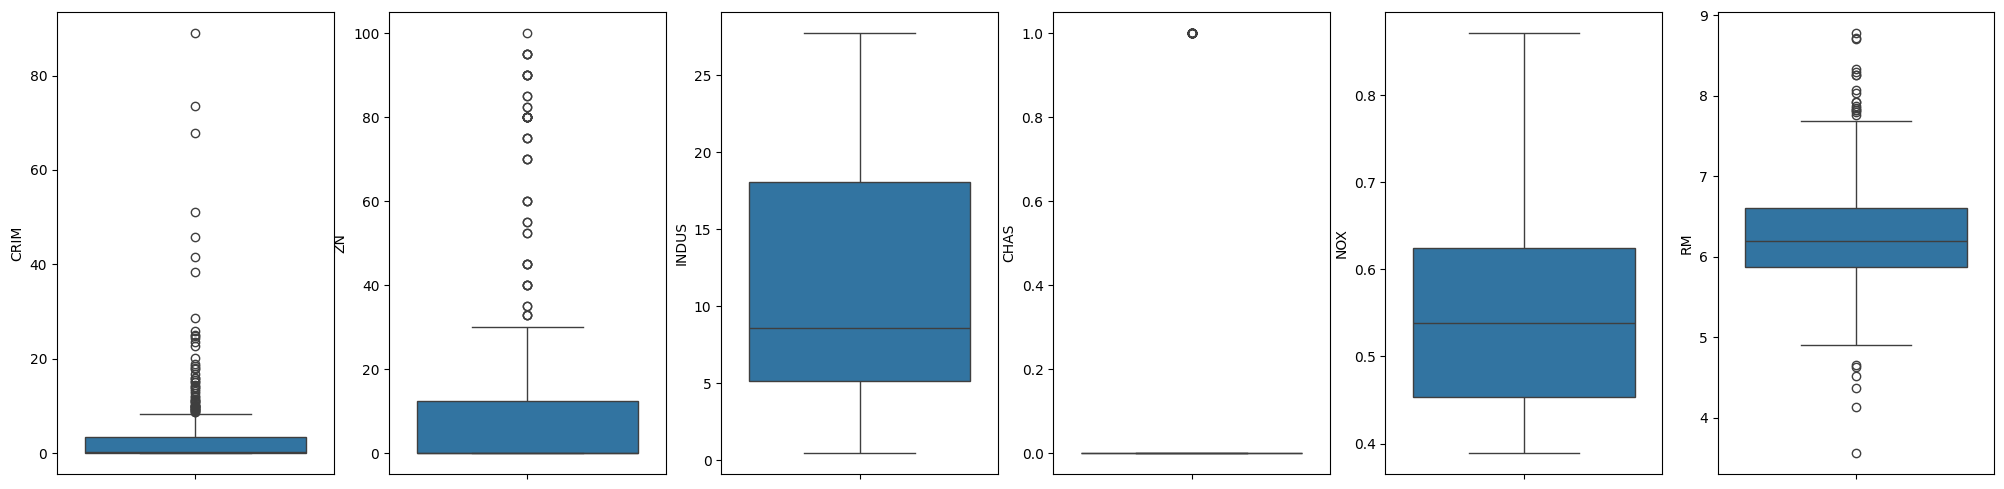

In [ ]:
plt.subplots(1,6,figsize=(25,6))
plt.subplot(161)
sns.boxplot(df['CRIM'])
plt.subplot(162)
sns.boxplot(df['ZN'])
plt.subplot(163)
sns.boxplot(df['INDUS'])
plt.subplot(164)
sns.boxplot(df['CHAS'])
plt.subplot(165)
sns.boxplot(df['NOX'])
plt.subplot(166)
sns.boxplot(df['RM'])

<Axes: ylabel='LSTAT'>

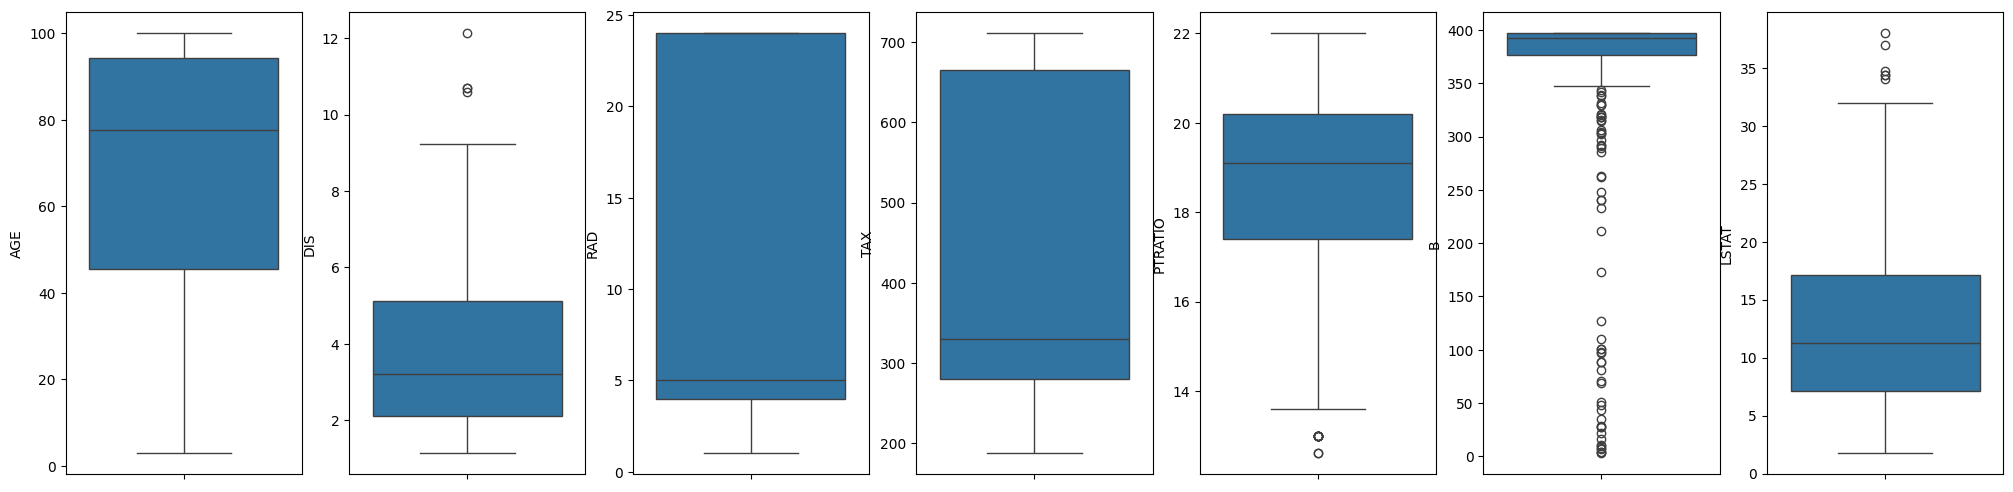

In [ ]:
plt.subplots(1,7,figsize=(25,6))
plt.subplot(171)
sns.boxplot(df['AGE'])
plt.subplot(172)
sns.boxplot(df['DIS'])
plt.subplot(173)
sns.boxplot(df['RAD'])
plt.subplot(174)
sns.boxplot(df['TAX'])
plt.subplot(175)
sns.boxplot(df['PTRATIO'])
plt.subplot(176)
sns.boxplot(df['B'])
plt.subplot(177)
sns.boxplot(df['LSTAT'])

In [ ]:
# Function to cap outliers using IQR method for all numerical columns
def cap_outliers_iqr(df):
    for column in df.columns:
        if df[column].dtype in ['float64', 'int64']:  # Apply only to numerical columns
            if column == 'CHAS':
                continue  # Skip the 'CHAS' column
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            # Cap outliers at the lower and upper bounds
            df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    return df

# Apply the function to cap outliers for all columns
df_cleaned = cap_outliers_iqr(df.copy())

# Display the dataset shape after capping
print(f"Original number of rows: {df.shape[0]}")
print(f"Number of rows after outlier capping: {df_cleaned.shape[0]}")  # This will remain the same

Original number of rows: 394
Number of rows after outlier capping: 394


In [ ]:
df_cleaned

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6,391,19.2,396.90,14.33,16.8
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9


<Axes: ylabel='RM'>

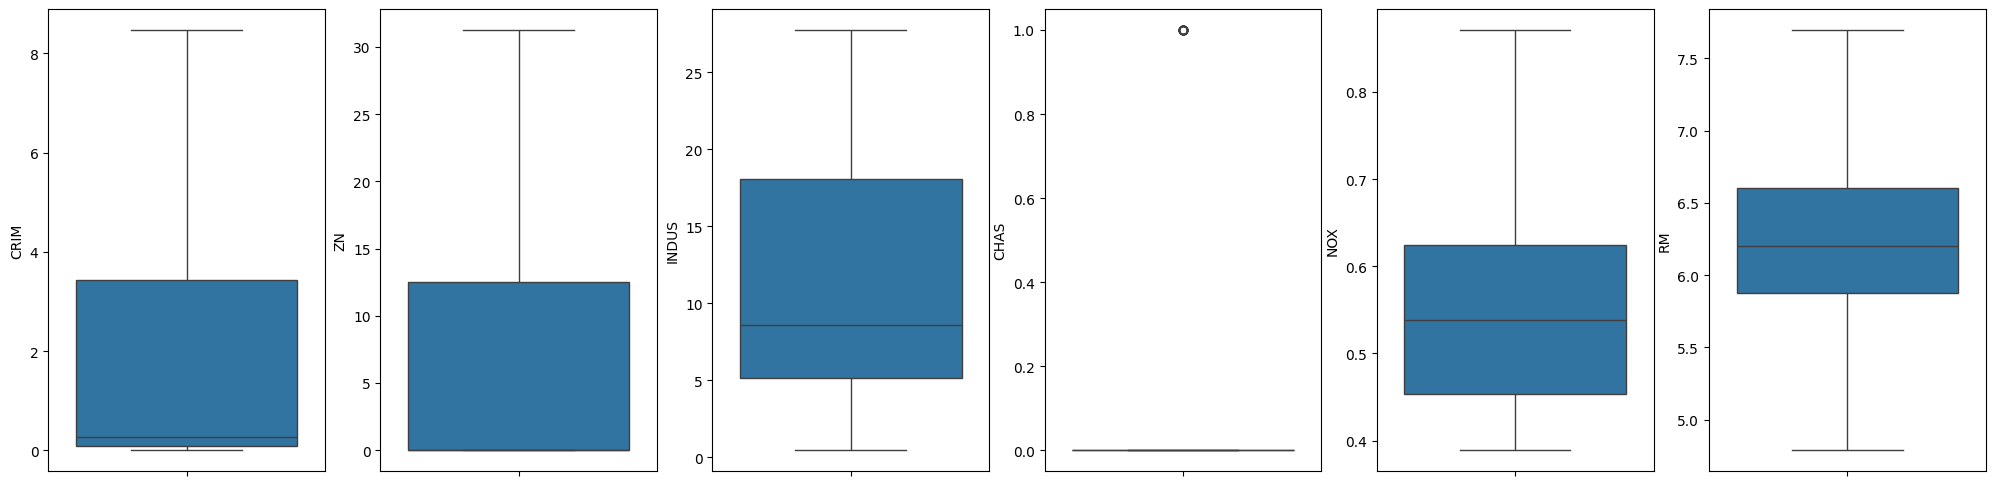

In [ ]:
plt.subplots(1,6,figsize=(25,6))
plt.subplot(161)
sns.boxplot(df_cleaned['CRIM'])
plt.subplot(162)
sns.boxplot(df_cleaned['ZN'])
plt.subplot(163)
sns.boxplot(df_cleaned['INDUS'])
plt.subplot(164)
sns.boxplot(df_cleaned['CHAS'])
plt.subplot(165)
sns.boxplot(df_cleaned['NOX'])
plt.subplot(166)
sns.boxplot(df_cleaned['RM'])

<Axes: ylabel='LSTAT'>

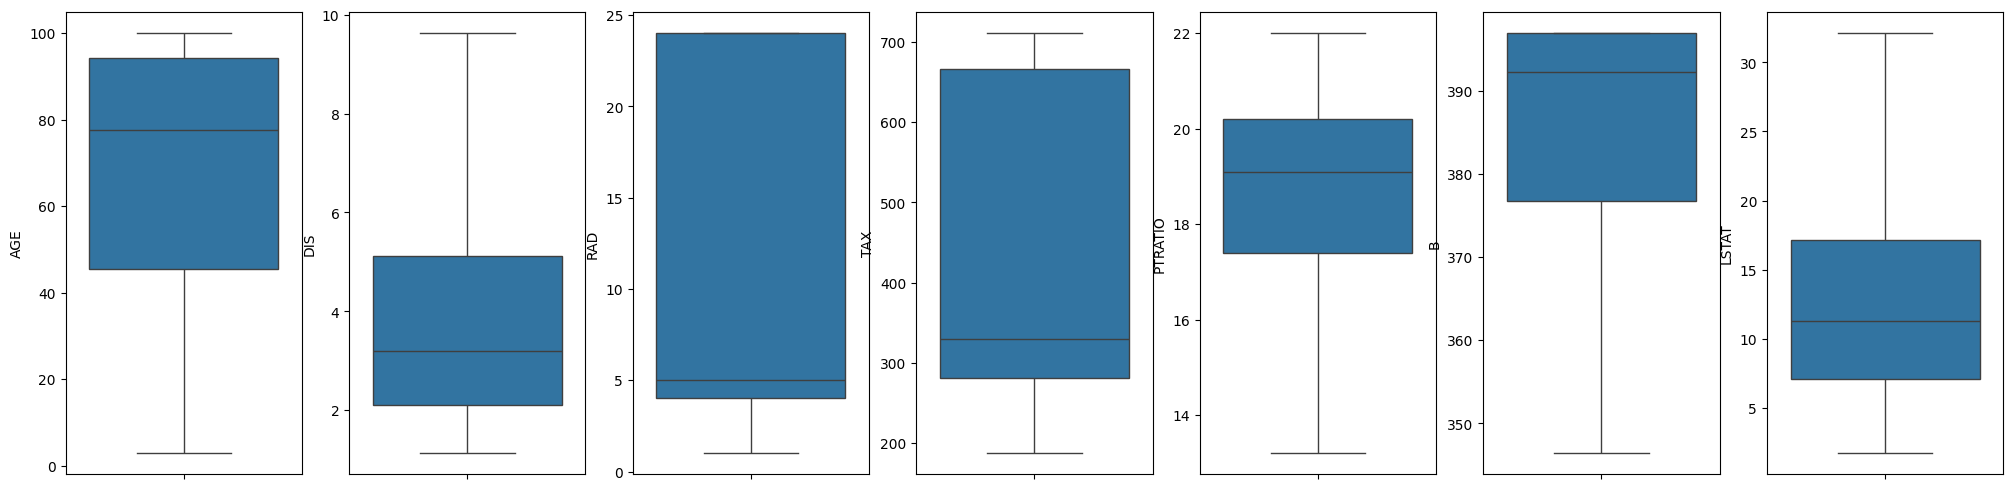

In [ ]:
plt.subplots(1,7,figsize=(25,6))
plt.subplot(171)
sns.boxplot(df_cleaned['AGE'])
plt.subplot(172)
sns.boxplot(df_cleaned['DIS'])
plt.subplot(173)
sns.boxplot(df_cleaned['RAD'])
plt.subplot(174)
sns.boxplot(df_cleaned['TAX'])
plt.subplot(175)
sns.boxplot(df_cleaned['PTRATIO'])
plt.subplot(176)
sns.boxplot(df_cleaned['B'])
plt.subplot(177)
sns.boxplot(df_cleaned['LSTAT'])

### **Transforming Data into normal distribution**

<Axes: xlabel='RM', ylabel='Count'>

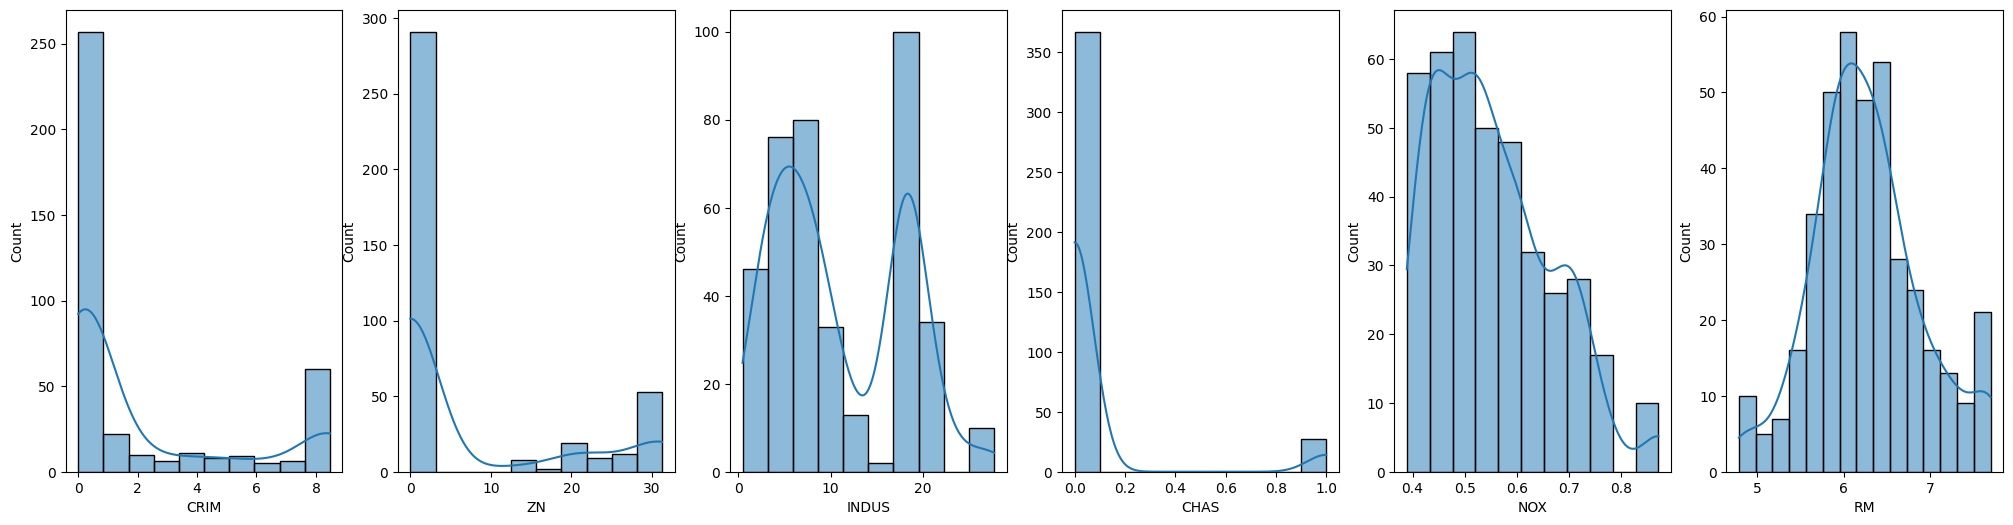

In [ ]:
plt.subplots(1,6,figsize=(25,6))
plt.subplot(161)
sns.histplot(df_cleaned['CRIM'],kde=True)
plt.subplot(162)
sns.histplot(df_cleaned['ZN'],kde=True)
plt.subplot(163)
sns.histplot(df_cleaned['INDUS'],kde= True)
plt.subplot(164)
sns.histplot(df_cleaned['CHAS'],kde= True)
plt.subplot(165)
sns.histplot(df_cleaned['NOX'],kde= True)
plt.subplot(166)
sns.histplot(df_cleaned['RM'],kde= True)

<Axes: xlabel='LSTAT', ylabel='Count'>

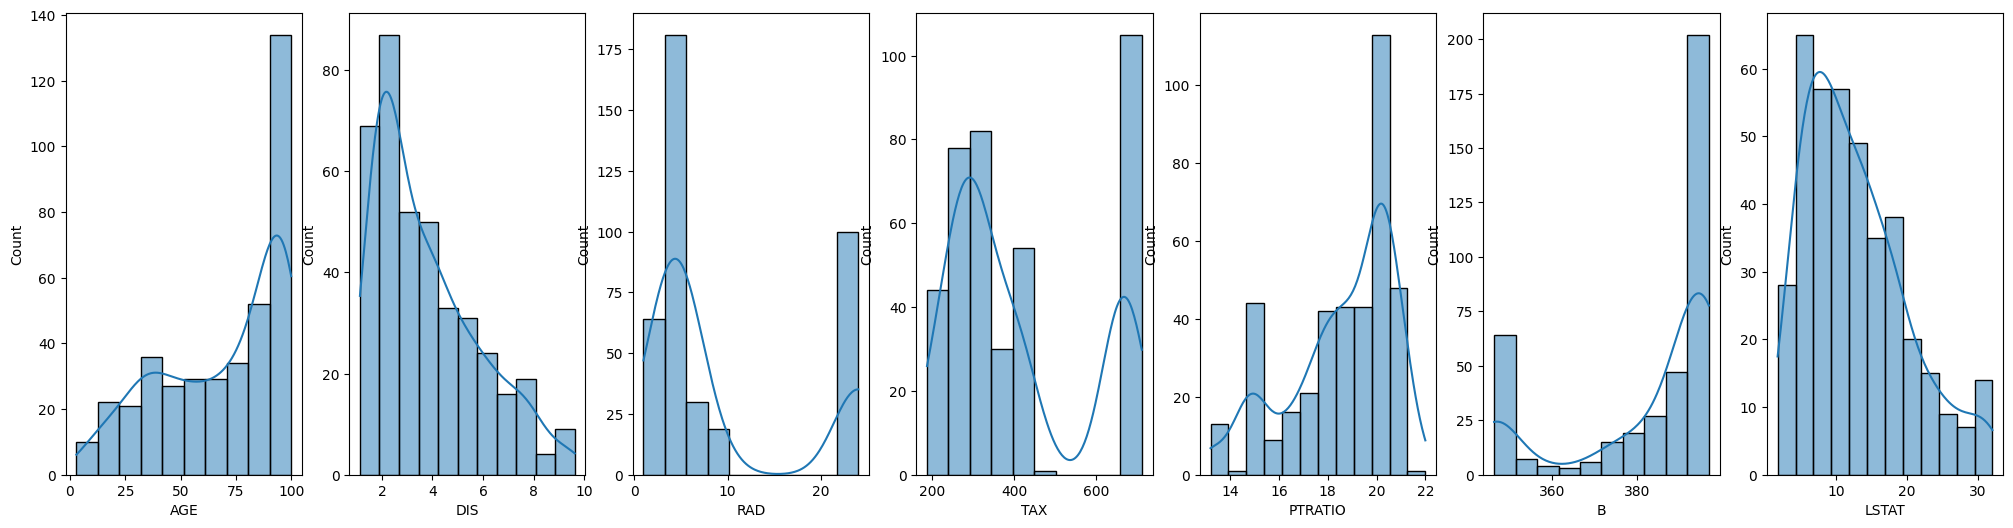

In [ ]:
plt.subplots(1,7,figsize=(25,6))
plt.subplot(171)
sns.histplot(df_cleaned['AGE'],kde=True)
plt.subplot(172)
sns.histplot(df_cleaned['DIS'],kde=True)
plt.subplot(173)
sns.histplot(df_cleaned['RAD'],kde= True)
plt.subplot(174)
sns.histplot(df_cleaned['TAX'],kde= True)
plt.subplot(175)
sns.histplot(df_cleaned['PTRATIO'],kde= True)
plt.subplot(176)
sns.histplot(df_cleaned['B'],kde= True)
plt.subplot(177)
sns.histplot(df_cleaned['LSTAT'],kde= True)

In [ ]:
from scipy.stats import boxcox
df_cleaned['CRIM']=np.log(df_cleaned['CRIM'])
df_cleaned['ZN']=np.log1p(df_cleaned['ZN'])
df_cleaned['INDUS']=np.sqrt(df_cleaned['INDUS'])
df_cleaned['NOX'], _ = boxcox(df_cleaned['NOX'] + 1)
df_cleaned['AGE'], _ = boxcox(df_cleaned['AGE'] + 1)
# df_cleaned['AGE']=np.sqrt(df_cleaned['AGE'])
df_cleaned['DIS'], _ = boxcox(df_cleaned['DIS'] + 1)
df_cleaned['B']=np.log1p(df_cleaned['B'])
df_cleaned['TAX']=np.log1p(df_cleaned['TAX'])
df_cleaned['PTRATIO'], _ = boxcox(df_cleaned['PTRATIO'] + 1)
df_cleaned['LSTAT'], _ = boxcox(df_cleaned['LSTAT'] + 1)
df_cleaned['RAD']=np.log1p(df_cleaned['RAD'])

<Axes: xlabel='RM', ylabel='Count'>

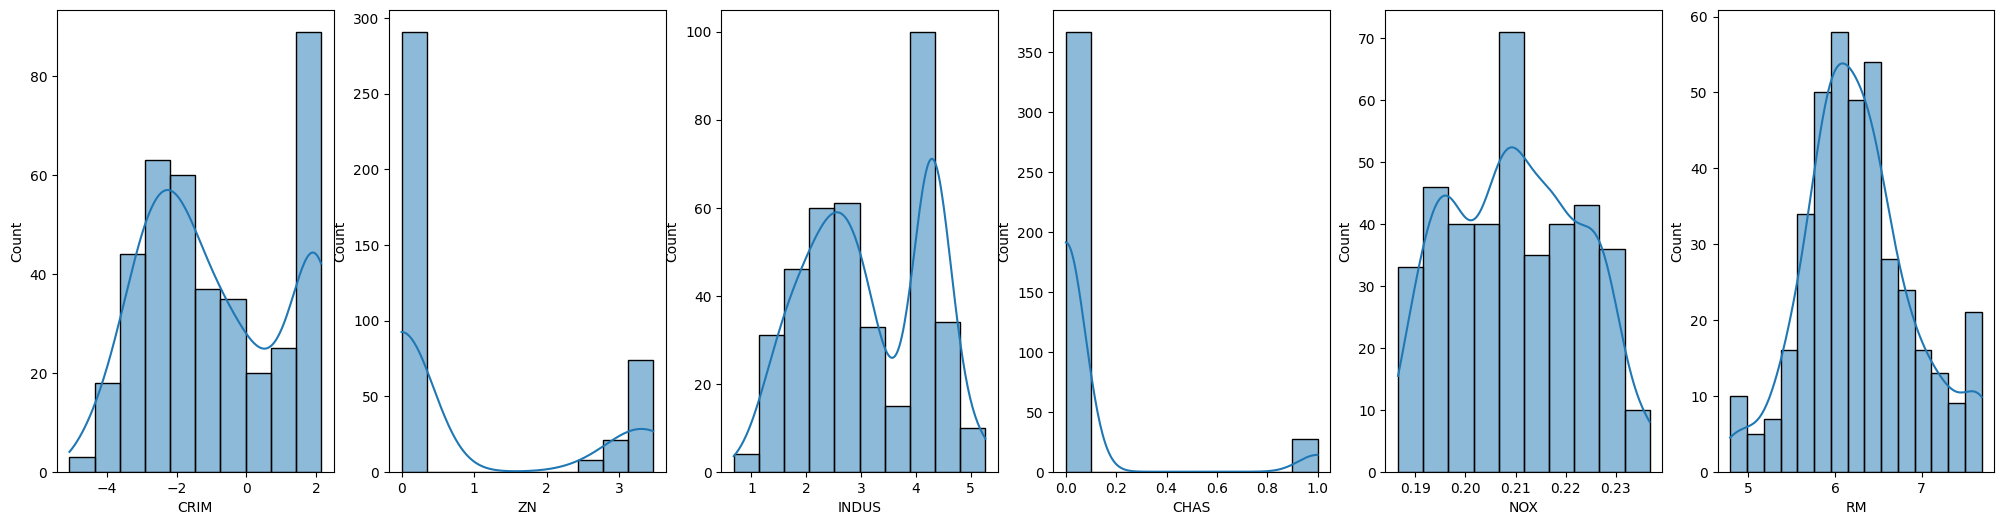

In [ ]:
plt.subplots(1,6,figsize=(25,6))
plt.subplot(161)
sns.histplot(df_cleaned['CRIM'],kde=True)
plt.subplot(162)
sns.histplot(df_cleaned['ZN'],kde=True)
plt.subplot(163)
sns.histplot(df_cleaned['INDUS'],kde= True)
plt.subplot(164)
sns.histplot(df_cleaned['CHAS'],kde= True)
plt.subplot(165)
sns.histplot(df_cleaned['NOX'],kde= True)
plt.subplot(166)
sns.histplot(df_cleaned['RM'],kde= True)

<Axes: xlabel='LSTAT', ylabel='Count'>

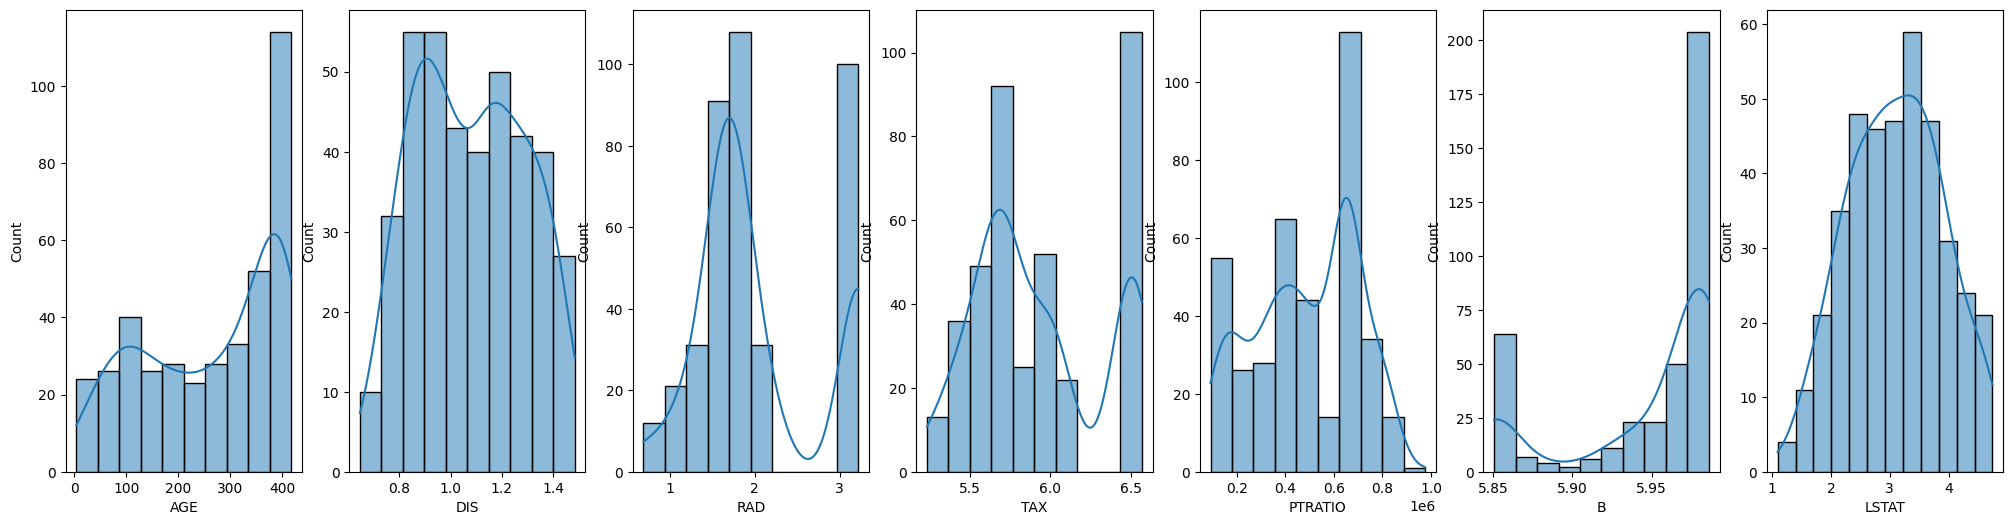

In [ ]:
plt.subplots(1,7,figsize=(25,6))
plt.subplot(171)
sns.histplot(df_cleaned['AGE'],kde=True)
plt.subplot(172)
sns.histplot(df_cleaned['DIS'],kde=True)
plt.subplot(173)
sns.histplot(df_cleaned['RAD'],kde= True)
plt.subplot(174)
sns.histplot(df_cleaned['TAX'],kde= True)
plt.subplot(175)
sns.histplot(df_cleaned['PTRATIO'],kde= True)
plt.subplot(176)
sns.histplot(df_cleaned['B'],kde= True)
plt.subplot(177)
sns.histplot(df_cleaned['LSTAT'],kde= True)

## **Dependent and Independent Features**

In [ ]:
Y = df_cleaned[['MEDV']]
X = df_cleaned.drop(columns = 'MEDV')

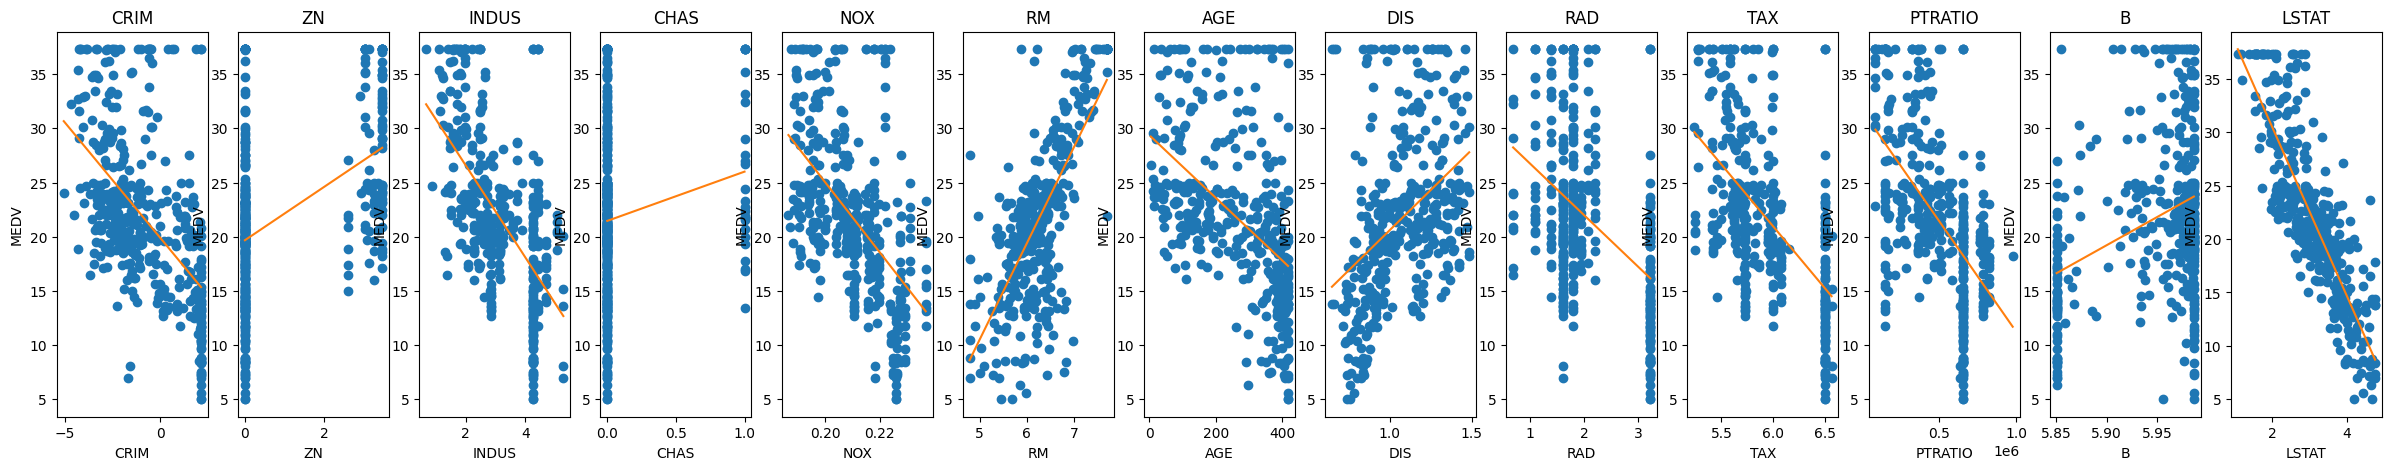

In [ ]:
plt.figure(figsize=(30,5))
for i,col in enumerate(X.columns):
  plt.subplot(1,len(X.columns),i+1)
  x= X[col]
  y= Y['MEDV']
  plt.plot(x,y,'o')
  plt.plot(np.unique(x),np.poly1d(np.polyfit(x,y,1))(np.unique(x)))
  plt.title(col)
  plt.xlabel(col)
  plt.ylabel('MEDV')

## **Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2, random_state=10)

In [ ]:
x_train.shape, x_test.shape , y_train.shape, y_test.shape

((315, 13), (79, 13), (315, 1), (79, 1))

In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 315 entries, 340 to 339
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     315 non-null    float64
 1   ZN       315 non-null    float64
 2   INDUS    315 non-null    float64
 3   CHAS     315 non-null    float64
 4   NOX      315 non-null    float64
 5   RM       315 non-null    float64
 6   AGE      315 non-null    float64
 7   DIS      315 non-null    float64
 8   RAD      315 non-null    float64
 9   TAX      315 non-null    float64
 10  PTRATIO  315 non-null    float64
 11  B        315 non-null    float64
 12  LSTAT    315 non-null    float64
dtypes: float64(13)
memory usage: 34.5 KB


In [ ]:
print(np.isinf(x_train).any())  # True if infinities exist
print(np.isfinite(x_train).all())  # False if non-finite values exist

# Check for very large values
print(np.max(x_train))  # Look for extreme values

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
dtype: bool
CRIM       True
ZN         True
INDUS      True
CHAS       True
NOX        True
RM         True
AGE        True
DIS        True
RAD        True
TAX        True
PTRATIO    True
B          True
LSTAT      True
dtype: bool
821144.9730617974


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

## **Model Training**

In [ ]:
regression = linearRegression()

In [ ]:
regression

In [ ]:
regression.fit(x_train_scaled,y_train)

In [ ]:
regression.show_theta()

[21.76222222  0.76941682  0.2614434  -0.63044893  0.53892868 -1.8540298
  1.50199331 -0.08586624 -2.45872149  0.56566086 -1.68625952 -1.12106775
  0.33489079 -4.43230566]


In [ ]:
regression.predict(x_test_scaled)

array([24.16464772, 28.79196005, 33.95122331, 15.9191973 , 27.49432953,
       21.2651714 , 12.28744778, 21.95316891, 13.2551735 , 19.05745627,
       23.20476107, 28.15274387, 30.96017784, 20.11769145, 15.70286799,
       19.71574629, 14.64166   , 23.46187243, 19.12396876, 28.88523645,
       22.31975442, 26.57359485, 11.83915451, 34.53540434, 19.66421923,
       20.92715477, 18.90273516, 33.34370132, 24.0491284 , 34.63779896,
       26.10317929, 21.49758312, 22.42040341, 15.0600896 , 14.56555032,
       24.41735145, 24.47940939, 36.60582786, 22.2620278 , 18.73607025,
       19.8303816 , 29.24503401, 23.19579387, 35.71075285, 32.23305365,
       31.54232222, 22.84074202, 16.15799245, 20.80657628, 26.11180627,
       24.02834814, 10.52540971, 20.27466591, 14.25397053, 13.16113396,
       26.62460156, 27.86463468, 11.23246453, 18.51026025, 37.31025156,
       16.06644098, 22.6537657 ,  6.16452254, 17.43855178, 24.77029104,
       20.37866918, 17.63181793,  9.27372484, 17.0642129 , 20.32

In [ ]:
from sklearn.metrics import r2_score
score = r2_score(y_test,regression.predict(x_test_scaled))
print(score)

0.8009891745185161


## **Comparing Model with sklearn LinearRegression Model**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(x_train_scaled,y_train)

LinearRegression()

In [ ]:
model.predict(x_test_scaled)

array([[24.18273285],
       [28.81567228],
       [34.0346096 ],
       [15.96753472],
       [27.53602238],
       [21.29474885],
       [12.28563335],
       [21.99960313],
       [13.30057015],
       [18.97706472],
       [23.21856065],
       [28.1737912 ],
       [30.97622297],
       [20.14699577],
       [15.66491156],
       [19.69027827],
       [14.58482726],
       [23.49751331],
       [19.08378731],
       [28.89210572],
       [22.39803187],
       [26.58426832],
       [11.77674475],
       [34.59286313],
       [19.67147503],
       [20.96945615],
       [18.8859176 ],
       [33.40629891],
       [24.02095218],
       [34.73527826],
       [26.10057083],
       [21.51028214],
       [22.38654263],
       [14.99426065],
       [14.55966625],
       [24.48024653],
       [24.51845614],
       [36.62914312],
       [22.34477067],
       [18.78197125],
       [19.82399699],
       [29.24937218],
       [23.19031374],
       [35.75541083],
       [32.19832961],
       [31

In [ ]:
from sklearn.metrics import r2_score
score = r2_score(y_test,model.predict(x_test_scaled))
print(score)

0.7997132088550626


## **Both model have same R2 Score**